In [3]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import seaborn as sns
sns.set()
#import tensorflow.compat.v1 as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

DATADIR = "C:/Users/Windows/Documents/MAT4906-fall21/Finial Project/datasets/asl_dataset"
CATEGORIES = ["3", "4", "5", "6","7","8","9"]

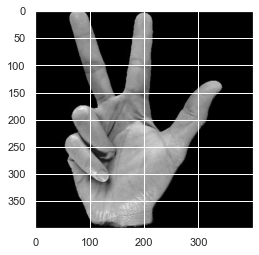

In [6]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

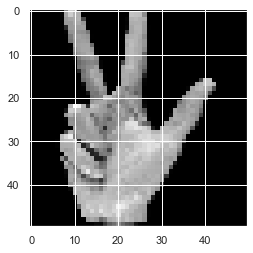

In [7]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

training_data = create_training_data()

490
(50, 50)


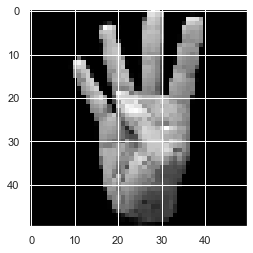

0


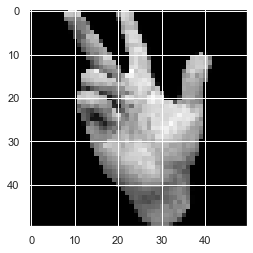

ValueError: cannot reshape array of size 564 into shape (376,1)

In [9]:
print(len(training_data))
print(training_data[0][0].shape)

plt.imshow(training_data[93][0], cmap = 'gray')
plt.show()

#Creating label dataset: 0, 1, and 2 means a, b, and c, respectively
label_data = []
letter = 0
for img in range(0,len(training_data),94):
    label_data.append(np.matlib.repmat(letter, 1, 94))
    letter = letter + 1
#print(label_data[1][0].shape)
print(label_data[0][0][50])
plt.imshow(training_data[69][0], cmap = 'gray')
plt.show()
labels = numpy.array(label_data).reshape((376,1))

#Convert to categorical
y = to_categorical(labels)

#labels_reshape = labels.reshape((376,1))
print(y)
#labels